In [1]:
import logging
logging.basicConfig(level=logging.INFO)
import matplotlib.pyplot as plt
import atlite

outdir = 'output/'

## MERRA2

In [2]:
DS = atlite.Dataset(	module="merra2",
						years=slice(2015, 2015),
						months=slice(1,12))
DS.trim_variables(downloadedfiles=True)

INFO:atlite.dataset:Directory /Users/michd/Research/GEODATA/data/merra2_GDsub found, checking for completeness.
INFO:atlite.dataset:Directory complete.


In [3]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="merra2_GDsub",
                       module="merra2",
                       xs = slice(108.125, 118.125),
                       ys = slice(28.0, 43.0),
                       years=[2015] )

INFO:atlite.cutout:No months specified, defaulting to 1-12
INFO:atlite.cutout:All cutout (merra2_GDsub, /Users/michd/Research/GEODATA/data/cutouts) files available.
INFO:atlite.preparation:[4, 1, 1, 10]
INFO:atlite.cutout:Cutout subset prepared: <Cutout merra2_GDsub x=108.12-118.12 y=28.00-43.00 time=2015/1-2015/12 prepared>


In [3]:
cutout.meta.dims

Frozen(SortedKeysDict({'y': 31, 'x': 17, 'time': 52584, 'year-month': 72}))

In [4]:
cutout.prepare()

INFO:atlite.preparation:Starting preparation of cutout 'merra2_GDsub'
INFO:atlite.datasets.merra2:MultiIndex([(2010,  1),
            (2010,  2),
            (2010,  3),
            (2010,  4),
            (2010,  5),
            (2010,  6),
            (2010,  7),
            (2010,  8),
            (2010,  9),
            (2010, 10),
            (2010, 11),
            (2010, 12),
            (2011,  1),
            (2011,  2),
            (2011,  3),
            (2011,  4),
            (2011,  5),
            (2011,  6),
            (2011,  7),
            (2011,  8),
            (2011,  9),
            (2011, 10),
            (2011, 11),
            (2011, 12),
            (2012,  1),
            (2012,  2),
            (2012,  3),
            (2012,  4),
            (2012,  5),
            (2012,  6),
            (2012,  7),
            (2012,  8),
            (2012,  9),
            (2012, 10),
            (2012, 11),
            (2012, 12),
            (2013,  1),
            (2

INFO:atlite.preparation:2191 tasks have been collected. Starting running them on all processors.
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100101.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/02/MERRA2_400.tavg1_2d_flx_Nx.20110216.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/10/MERRA2_300.tavg1_2d_flx_Nx.20101002.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/05/MERRA2_300.tavg1_2d_flx_Nx.20100518.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100102.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/02/MERRA2_400.tavg1_2d_flx_Nx.20110217.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/10/MERRA2

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/03/MERRA2_400.tavg1_2d_flx_Nx.20110303.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100116.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/06/MERRA2_300.tavg1_2d_flx_Nx.20100602.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/03/MERRA2_400.tavg1_2d_flx_Nx.20110304.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/10/MERRA2_300.tavg1_2d_flx_Nx.20101018.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/06/MERRA2_300.tavg1_2d_flx_Nx.20100603.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100117.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100131.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/11/MERRA2_300.tavg1_2d_flx_Nx.20101102.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/06/MERRA2_300.tavg1_2d_flx_Nx.20100617.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/03/MERRA2_400.tavg1_2d_flx_Nx.20110320.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/02/MERRA2_300.tavg1_2d_flx_Nx.20100201.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/06/MERRA2_300.tavg1_2d_flx_Nx.20100618.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/11/MERRA2_300.tavg1_2d_flx_Nx.20101103.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/11/MERRA2_300.tavg1_2d_flx_Nx.20101117.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/07/MERRA2_300.tavg1_2d_flx_Nx.20100703.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/02/MERRA2_300.tavg1_2d_flx_Nx.20100216.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/11/MERRA2_300.tavg1_2d_flx_Nx.20101118.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/02/MERRA2_300.tavg1_2d_flx_Nx.20100217.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/04/MERRA2_400.tavg1_2d_flx_Nx.20110404.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/07/MERRA2_300.tavg1_2d_flx_Nx.20100704.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/12/MERRA2_300.tavg1_2d_flx_Nx.20101204.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/07/MERRA2_300.tavg1_2d_flx_Nx.20100718.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/03/MERRA2_300.tavg1_2d_flx_Nx.20100303.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/04/MERRA2_400.tavg1_2d_flx_Nx.20110419.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/12/MERRA2_300.tavg1_2d_flx_Nx.20101205.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/07/MERRA2_300.tavg1_2d_flx_Nx.20100719.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/03/MERRA2_300.tavg1_2d_flx_Nx.20100304.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/03/MERRA2_300.tavg1_2d_flx_Nx.20100318.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/12/MERRA2_300.tavg1_2d_flx_Nx.20101221.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/05/MERRA2_400.tavg1_2d_flx_Nx.20110502.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/08/MERRA2_300.tavg1_2d_flx_Nx.20100804.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/12/MERRA2_300.tavg1_2d_flx_Nx.20101222.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/03/MERRA2_300.tavg1_2d_flx_Nx.20100319.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/08/MERRA2_300.tavg1_2d_flx_Nx.20100805.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/08/MERRA2_300.tavg1_2d_flx_Nx.20100819.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/05/MERRA2_400.tavg1_2d_flx_Nx.20110517.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/04/MERRA2_300.tavg1_2d_flx_Nx.20100403.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/08/MERRA2_300.tavg1_2d_flx_Nx.20100820.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/05/MERRA2_400.tavg1_2d_flx_Nx.20110518.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/01/MERRA2_400.tavg1_2d_flx_Nx.20110106.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/05/MERRA2_400.tavg1_2d_flx_Nx.20110519.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/06/MERRA2_400.tavg1_2d_flx_Nx.20110602.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/04/MERRA2_300.tavg1_2d_flx_Nx.20100418.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/01/MERRA2_400.tavg1_2d_flx_Nx.20110121.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/09/MERRA2_300.tavg1_2d_flx_Nx.20100904.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/04/MERRA2_300.tavg1_2d_flx_Nx.20100419.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/09/MERRA2_300.tavg1_2d_flx_Nx.20100905.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/06/MERRA2_400.tavg1_2d_flx_Nx.20110603.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/06/MERRA2_400.tavg1_2d_flx_Nx.20110617.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/02/MERRA2_400.tavg1_2d_flx_Nx.20110205.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/05/MERRA2_300.tavg1_2d_flx_Nx.20100505.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/09/MERRA2_300.tavg1_2d_flx_Nx.20100919.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/06/MERRA2_400.tavg1_2d_flx_Nx.20110618.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2010/05/MERRA2_300.tavg1_2d_flx_Nx.20100506.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/06/MERRA2_400.tavg1_2d_flx_Nx.20110619.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/04/MERRA2_400.tavg1_2d_flx_Nx.20120404.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/11/MERRA2_400.tavg1_2d_flx_Nx.20111119.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/08/MERRA2_400.tavg1_2d_flx_Nx.20120817.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/07/MERRA2_400.tavg1_2d_flx_Nx.20110708.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/04/MERRA2_400.tavg1_2d_flx_Nx.20120405.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/11/MERRA2_400.tavg1_2d_flx_Nx.20111120.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/08/MERRA2_400.tavg1_2d_flx_Nx.20120818.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/07/MERRA2_400.tavg1_2d_flx_Nx.20110723.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/04/MERRA2_400.tavg1_2d_flx_Nx.20120420.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/09/MERRA2_400.tavg1_2d_flx_Nx.20120902.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/07/MERRA2_400.tavg1_2d_flx_Nx.20110724.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/12/MERRA2_400.tavg1_2d_flx_Nx.20111204.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/04/MERRA2_400.tavg1_2d_flx_Nx.20120421.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/09/MERRA2_400.tavg1_2d_flx_Nx.20120903.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/08/MERRA2_400.tavg1_2d_flx_Nx.20110808.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/05/MERRA2_400.tavg1_2d_flx_Nx.20120505.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/09/MERRA2_400.tavg1_2d_flx_Nx.20120918.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/12/MERRA2_400.tavg1_2d_flx_Nx.20111219.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/08/MERRA2_400.tavg1_2d_flx_Nx.20110809.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/05/MERRA2_400.tavg1_2d_flx_Nx.20120506.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/09/MERRA2_400.tavg1_2d_flx_Nx.20120919.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/08/MERRA2_400.tavg1_2d_flx_Nx.20110823.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/01/MERRA2_400.tavg1_2d_flx_Nx.20120103.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/05/MERRA2_400.tavg1_2d_flx_Nx.20120521.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/08/MERRA2_400.tavg1_2d_flx_Nx.20110824.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/01/MERRA2_400.tavg1_2d_flx_Nx.20120104.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/10/MERRA2_400.tavg1_2d_flx_Nx.20121004.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/05/MERRA2_400.tavg1_2d_flx_Nx.20120522.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/10/MERRA2_400.tavg1_2d_flx_Nx.20121018.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/06/MERRA2_400.tavg1_2d_flx_Nx.20120606.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/09/MERRA2_400.tavg1_2d_flx_Nx.20110908.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/10/MERRA2_400.tavg1_2d_flx_Nx.20121019.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/01/MERRA2_400.tavg1_2d_flx_Nx.20120119.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/09/MERRA2_400.tavg1_2d_flx_Nx.20110909.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/06/MERRA2_400.tavg1_2d_flx_Nx.20120607.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/06/MERRA2_400.tavg1_2d_flx_Nx.20120622.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/09/MERRA2_400.tavg1_2d_flx_Nx.20110924.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/11/MERRA2_400.tavg1_2d_flx_Nx.20121102.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/02/MERRA2_400.tavg1_2d_flx_Nx.20120203.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/06/MERRA2_400.tavg1_2d_flx_Nx.20120623.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/11/MERRA2_400.tavg1_2d_flx_Nx.20121103.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/02/MERRA2_400.tavg1_2d_flx_Nx.20120204.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/02/MERRA2_400.tavg1_2d_flx_Nx.20120218.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/11/MERRA2_400.tavg1_2d_flx_Nx.20121117.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/11/MERRA2_400.tavg1_2d_flx_Nx.20121118.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/10/MERRA2_400.tavg1_2d_flx_Nx.20111010.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/02/MERRA2_400.tavg1_2d_flx_Nx.20120219.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/07/MERRA2_400.tavg1_2d_flx_Nx.20120708.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/11/MERRA2_400.tavg1_2d_flx_Nx.20121119.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/12/MERRA2_400.tavg1_2d_flx_Nx.20121202.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/10/MERRA2_400.tavg1_2d_flx_Nx.20111025.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/07/MERRA2_400.tavg1_2d_flx_Nx.20120724.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/03/MERRA2_400.tavg1_2d_flx_Nx.20120305.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/10/MERRA2_400.tavg1_2d_flx_Nx.20111026.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/12/MERRA2_400.tavg1_2d_flx_Nx.20121203.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/03/MERRA2_400.tavg1_2d_flx_Nx.20120306.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/08/MERRA2_400.tavg1_2d_flx_Nx.20120808.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/12/MERRA2_400.tavg1_2d_flx_Nx.20121218.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/11/MERRA2_400.tavg1_2d_flx_Nx.20111109.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/03/MERRA2_400.tavg1_2d_flx_Nx.20120321.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/12/MERRA2_400.tavg1_2d_flx_Nx.20121219.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2012/08/MERRA2_400.tavg1_2d_flx_Nx.20120809.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2011/11/MERRA2_400.tavg1_2d_flx_Nx.20111110.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/01/MERRA2_400.tavg1_2d_flx_Nx.20130108.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/10/MERRA2_400.tavg1_2d_flx_Nx.20131006.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/02/MERRA2_400.tavg1_2d_flx_Nx.20140217.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/10/MERRA2_400.tavg1_2d_flx_Nx.20131007.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/02/MERRA2_400.tavg1_2d_flx_Nx.20140218.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/01/MERRA2_400.tavg1_2d_flx_Nx.20130109.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/05/MERRA2_400.tavg1_2d_flx_Nx.20130525.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/10/MERRA2_400.tavg1_2d_flx_Nx.20131021.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/06/MERRA2_400.tavg1_2d_flx_Nx.20130609.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/01/MERRA2_400.tavg1_2d_flx_Nx.20130124.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/03/MERRA2_400.tavg1_2d_flx_Nx.20140305.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/10/MERRA2_400.tavg1_2d_flx_Nx.20131022.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/06/MERRA2_400.tavg1_2d_flx_Nx.20130610.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/03/MERRA2_400.tavg1_2d_flx_Nx.20140306.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/11/MERRA2_400.tavg1_2d_flx_Nx.20131105.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/03/MERRA2_400.tavg1_2d_flx_Nx.20140320.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/06/MERRA2_400.tavg1_2d_flx_Nx.20130625.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/02/MERRA2_400.tavg1_2d_flx_Nx.20130209.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/03/MERRA2_400.tavg1_2d_flx_Nx.20140321.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/11/MERRA2_400.tavg1_2d_flx_Nx.20131106.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/02/MERRA2_400.tavg1_2d_flx_Nx.20130210.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/11/MERRA2_400.tavg1_2d_flx_Nx.20131121.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/02/MERRA2_400.tavg1_2d_flx_Nx.20130223.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/04/MERRA2_400.tavg1_2d_flx_Nx.20140405.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/11/MERRA2_400.tavg1_2d_flx_Nx.20131122.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/07/MERRA2_400.tavg1_2d_flx_Nx.20130711.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/02/MERRA2_400.tavg1_2d_flx_Nx.20130224.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/04/MERRA2_400.tavg1_2d_flx_Nx.20140406.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/12/MERRA2_400.tavg1_2d_flx_Nx.20131206.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/07/MERRA2_400.tavg1_2d_flx_Nx.20130726.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/03/MERRA2_400.tavg1_2d_flx_Nx.20130311.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/12/MERRA2_400.tavg1_2d_flx_Nx.20131207.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/04/MERRA2_400.tavg1_2d_flx_Nx.20140421.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/03/MERRA2_400.tavg1_2d_flx_Nx.20130312.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/07/MERRA2_400.tavg1_2d_flx_Nx.20130727.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/05/MERRA2_400.tavg1_2d_flx_Nx.20140505.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/12/MERRA2_400.tavg1_2d_flx_Nx.20131222.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/08/MERRA2_400.tavg1_2d_flx_Nx.20130812.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/05/MERRA2_400.tavg1_2d_flx_Nx.20140506.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/12/MERRA2_400.tavg1_2d_flx_Nx.20131223.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/03/MERRA2_400.tavg1_2d_flx_Nx.20130326.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/08/MERRA2_400.tavg1_2d_flx_Nx.20130813.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/08/MERRA2_400.tavg1_2d_flx_Nx.20130826.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/05/MERRA2_400.tavg1_2d_flx_Nx.20140521.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/08/MERRA2_400.tavg1_2d_flx_Nx.20130827.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/04/MERRA2_400.tavg1_2d_flx_Nx.20130411.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/01/MERRA2_400.tavg1_2d_flx_Nx.20140107.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/05/MERRA2_400.tavg1_2d_flx_Nx.20140522.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/08/MERRA2_400.tavg1_2d_flx_Nx.20130828.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/01/MERRA2_400.tavg1_2d_flx_Nx.20140121.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/01/MERRA2_400.tavg1_2d_flx_Nx.20140122.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/09/MERRA2_400.tavg1_2d_flx_Nx.20130911.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/06/MERRA2_400.tavg1_2d_flx_Nx.20140607.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/04/MERRA2_400.tavg1_2d_flx_Nx.20130426.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/06/MERRA2_400.tavg1_2d_flx_Nx.20140608.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/01/MERRA2_400.tavg1_2d_flx_Nx.20140123.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/09/MERRA2_400.tavg1_2d_flx_Nx.20130926.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/06/MERRA2_400.tavg1_2d_flx_Nx.20140623.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/02/MERRA2_400.tavg1_2d_flx_Nx.20140206.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/05/MERRA2_400.tavg1_2d_flx_Nx.20130511.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/09/MERRA2_400.tavg1_2d_flx_Nx.20130927.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/06/MERRA2_400.tavg1_2d_flx_Nx.20140624.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2013/05/MERRA2_400.tavg1_2d_flx_Nx.20130512.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/07/MERRA2_400.tavg1_2d_flx_Nx.20140712.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/08/MERRA2_400.tavg1_2d_flx_Nx.20150823.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/11/MERRA2_400.tavg1_2d_flx_Nx.20141126.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/08/MERRA2_400.tavg1_2d_flx_Nx.20150824.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/07/MERRA2_400.tavg1_2d_flx_Nx.20140713.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/04/MERRA2_400.tavg1_2d_flx_Nx.20150409.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/08/MERRA2_400.tavg1_2d_flx_Nx.20150825.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/04/MERRA2_400.tavg1_2d_flx_Nx.20150424.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/09/MERRA2_400.tavg1_2d_flx_Nx.20150907.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/07/MERRA2_400.tavg1_2d_flx_Nx.20140729.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/12/MERRA2_400.tavg1_2d_flx_Nx.20141211.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/04/MERRA2_400.tavg1_2d_flx_Nx.20150425.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/07/MERRA2_400.tavg1_2d_flx_Nx.20140730.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/09/MERRA2_400.tavg1_2d_flx_Nx.20150908.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/05/MERRA2_400.tavg1_2d_flx_Nx.20150510.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/08/MERRA2_400.tavg1_2d_flx_Nx.20140814.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/12/MERRA2_400.tavg1_2d_flx_Nx.20141226.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/09/MERRA2_400.tavg1_2d_flx_Nx.20150922.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/05/MERRA2_400.tavg1_2d_flx_Nx.20150511.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/08/MERRA2_400.tavg1_2d_flx_Nx.20140815.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/09/MERRA2_400.tavg1_2d_flx_Nx.20150923.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/08/MERRA2_400.tavg1_2d_flx_Nx.20140829.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/05/MERRA2_400.tavg1_2d_flx_Nx.20150527.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/01/MERRA2_400.tavg1_2d_flx_Nx.20150110.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/10/MERRA2_400.tavg1_2d_flx_Nx.20151007.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/08/MERRA2_400.tavg1_2d_flx_Nx.20140830.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/05/MERRA2_400.tavg1_2d_flx_Nx.20150528.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/10/MERRA2_400.tavg1_2d_flx_Nx.20151008.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/01/MERRA2_400.tavg1_2d_flx_Nx.20150125.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/06/MERRA2_400.tavg1_2d_flx_Nx.20150611.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/10/MERRA2_400.tavg1_2d_flx_Nx.20151023.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/09/MERRA2_400.tavg1_2d_flx_Nx.20140914.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/01/MERRA2_400.tavg1_2d_flx_Nx.20150126.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/06/MERRA2_400.tavg1_2d_flx_Nx.20150612.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/10/MERRA2_400.tavg1_2d_flx_Nx.20151024.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/06/MERRA2_400.tavg1_2d_flx_Nx.20150627.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/11/MERRA2_400.tavg1_2d_flx_Nx.20151108.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/02/MERRA2_400.tavg1_2d_flx_Nx.20150209.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/09/MERRA2_400.tavg1_2d_flx_Nx.20140929.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/06/MERRA2_400.tavg1_2d_flx_Nx.20150628.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/11/MERRA2_400.tavg1_2d_flx_Nx.20151109.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/02/MERRA2_400.tavg1_2d_flx_Nx.20150210.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/02/MERRA2_400.tavg1_2d_flx_Nx.20150224.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/10/MERRA2_400.tavg1_2d_flx_Nx.20141013.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/07/MERRA2_400.tavg1_2d_flx_Nx.20150713.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/02/MERRA2_400.tavg1_2d_flx_Nx.20150225.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/11/MERRA2_400.tavg1_2d_flx_Nx.20151125.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/10/MERRA2_400.tavg1_2d_flx_Nx.20141014.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/07/MERRA2_400.tavg1_2d_flx_Nx.20150714.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/03/MERRA2_400.tavg1_2d_flx_Nx.20150312.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/07/MERRA2_400.tavg1_2d_flx_Nx.20150728.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/12/MERRA2_400.tavg1_2d_flx_Nx.20151210.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/10/MERRA2_400.tavg1_2d_flx_Nx.20141029.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/07/MERRA2_400.tavg1_2d_flx_Nx.20150729.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/03/MERRA2_400.tavg1_2d_flx_Nx.20150313.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/12/MERRA2_400.tavg1_2d_flx_Nx.20151211.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/08/MERRA2_400.tavg1_2d_flx_Nx.20150812.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/03/MERRA2_400.tavg1_2d_flx_Nx.20150327.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/11/MERRA2_400.tavg1_2d_flx_Nx.20141113.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/08/MERRA2_400.tavg1_2d_flx_Nx.20150813.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2014/11/MERRA2_400.tavg1_2d_flx_Nx.20141114.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/03/MERRA2_400.tavg1_2d_flx_Nx.20150328.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEODATA/data/merra2_GDsub/2015/12/MERRA2_400.tavg1_2d_flx_Nx.20151227.nc4`
INFO:atlite.datasets.merra2:Opening `/Users/michd/Research/GEO

In [5]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="merra2-europe-sub2-2011-01",
                       module="merra2",
                       xs=slice(30, 41.56244222),
                        ys=slice(33.56459975, 35),
                       years=slice(2011, 2011),
                       months=slice(1,1,1) )

KeyboardInterrupt: 

In [4]:
cutout.meta.dims

NameError: name 'cutout' is not defined

## ERA5

In [2]:
## Load cutout
# if already created, should just return reference to that folder
cutout = atlite.Cutout(name="europe-sub2-2011-01",
                       module="era5",
                       xs=slice(30, 41.56244222),
                       ys=slice(35, 33.56459975),
                       years=slice(2011, 2011),
                       months=slice(1,1,1) )

INFO:atlite.cutout:All cutout (europe-sub2-2011-01, /Users/michd/Research/GEODATA/data/cutouts) files available.
INFO:atlite.preparation:[4, 1, 1, 10]
INFO:atlite.cutout:Cutout subset prepared: <Cutout europe-sub2-2011-01 x=30.00-41.50 y=35.00-33.75 time=2011/1-2011/1 prepared>


## Convert wind

In [46]:
## Wind profiles
# call: wind(cutout, turbine, smooth=False, **params)
#	.. cutout.convert_and_aggregate(convert_func=convert_wind, turbine=turbine,**params)
# Returns xr.DataArray
ds = atlite.convert.wind(cutout, turbine='Suzlon_S82_1.5_MW', smooth=True, var_height='lml')

INFO:atlite.convert:Keeping time dimension.


In [4]:
## Wind profiles
# call: wind(cutout, turbine, smooth=False, **params)
#	.. cutout.convert_and_aggregate(convert_func=convert_wind, turbine=turbine,**params)
# Returns xr.DataArray
ds = atlite.convert.windspd(cutout, turbine='Suzlon_S82_1.5_MW', var_height='lml')

INFO:atlite.convert:Keeping time dimension.


## Saving and plotting

In [5]:
# Pandas and save to csv
df = ds.to_dataframe(name='power')
# df.to_csv(outdir + 'merra2_wind_test_sm.csv')
df.reset_index(level=df.index.names, inplace=True)
df.head()

,time,y,x,lon,lat,power
0,2010-01-01 00:30:00,28.0,108.125,108.125,28.0,2.076665
1,2010-01-01 00:30:00,28.0,108.750,108.750,28.0,2.917051
2,2010-01-01 00:30:00,28.0,109.375,109.375,28.0,3.626396
3,2010-01-01 00:30:00,28.0,110.000,110.000,28.0,2.365997
4,2010-01-01 00:30:00,28.0,110.625,110.625,28.0,3.544151


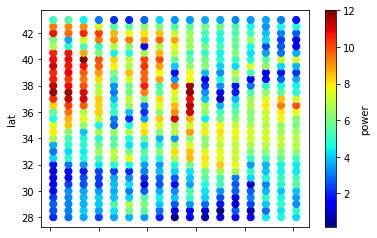

In [7]:
# Plot
df[df.time == '2010-01-01 00:30:00'].plot.scatter(x='lon', y='lat', c='power',s=50,  cmap='jet')
plt.show()

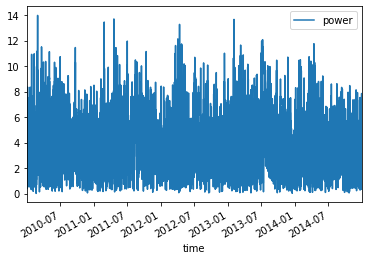

In [6]:
# Plot
# df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='power')
df[(df.lat == 28.0) & (df.lon == 108.125)].plot(x='time', y='power')
plt.show()

## Playing with nc files

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# x = xr.open_dataset('/Users/michd/Documents/GEODATA/data/merra2/2011/01/MERRA2_400.tavg1_2d_flx_Nx.20110118.nc4')
x = xr.open_dataset('/Users/michd/Documents/GEODATA/data/merra2_GDsub/2010/01/MERRA2_300.tavg1_2d_flx_Nx.20100101.nc4')
x

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 17, time: 24)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01T00:30:00 ... 2010-01-01T23:30:00
  * lat      (lat) float64 28.0 28.5 29.0 29.5 30.0 ... 41.0 41.5 42.0 42.5 43.0
  * lon      (lon) float64 108.1 108.8 109.4 110.0 ... 116.2 116.9 117.5 118.1
Data variables:
    vlml     (time, lat, lon) float32 ...
    eflux    (time, lat, lon) float32 ...
    hlml     (time, lat, lon) float32 ...
    ustar    (time, lat, lon) float32 ...
    ulml     (time, lat, lon) float32 ...
    rhoa     (time, lat, lon) float32 ...
    z0m      (time, lat, lon) float32 ...
    hflux    (time, lat, lon) float32 ...
    tstar    (time, lat, lon) float32 ...
    disph    (time, lat, lon) float32 ...
    pblh     (time, lat, lon) float32 ...
    tlml     (time, lat, lon) float32 ...
Attributes:
    History:                           Original file generated: Mon Mar 23 03...
    Comment:                           GMAO filename: d5124_m2_jan00.tavg1_2

In [15]:
x.close()

In [9]:
ds = xr.open_dataset('/Users/michd/Research/GEODATA/data/cutouts/merra2_GDsub/meta.nc')
print(ds.dims)
ds.close()

Frozen(SortedKeysDict({'y': 31, 'time': 43824, 'x': 17, 'year': 5, 'month': 12}))


In [20]:
ds['hlml'].attrs

{'long_name': 'surface_layer_height\nheight=lmlheight=lml, height=lml',
 'units': 'm',
 'fmissing_value': 1000000000000000.0,
 'standard_name': 'surface_layer_height',
 'vmax': 1000000000000000.0,
 'vmin': -1000000000000000.0,
 'valid_range': array([-1.e+15,  1.e+15], dtype=float32)}

In [5]:
df = ds.to_dataframe()
df.reset_index(level=df.index.names, inplace=True)

In [8]:
df.head()

,time,x,y,lon,lat,rhoa,tlml,ulml,tstar,hflux,ustar,disph,vlml,eflux,hlml,pblh,roughness,wndlml
0,2011-01-01 00:30:00,30.000,34.0,30.000,34.0,1.229721,287.149048,6.791270,0.119368,45.711918,0.309788,0.0,-4.656317,212.649811,63.736580,1275.323364,0.000334,8.234236
1,2011-01-01 00:30:00,30.000,34.5,30.000,34.5,1.229599,287.133423,6.248302,0.107679,36.860355,0.275975,0.0,-4.024481,189.837311,63.722908,1294.823364,0.000274,7.432208
2,2011-01-01 00:30:00,30.000,35.0,30.000,35.0,1.226425,287.758423,4.089122,0.093672,21.696293,0.184971,0.0,-2.882879,135.149811,63.859627,1513.323364,0.000148,5.003190
3,2011-01-01 00:30:00,30.625,34.0,30.625,34.0,1.227280,287.570923,6.961192,0.111341,40.883793,0.297093,0.0,-3.819403,205.337311,63.834236,1355.323364,0.000310,7.940154
4,2011-01-01 00:30:00,30.625,34.5,30.625,34.5,1.225449,287.867798,5.472911,0.092390,27.799809,0.242466,0.0,-3.646551,164.712311,63.900642,1415.823364,0.000217,6.576480


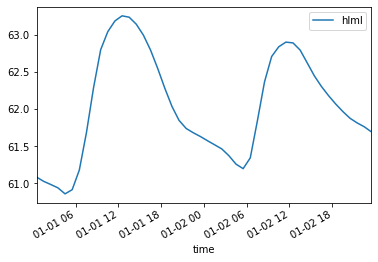

In [11]:
# Plot
df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='hlml')
plt.show()

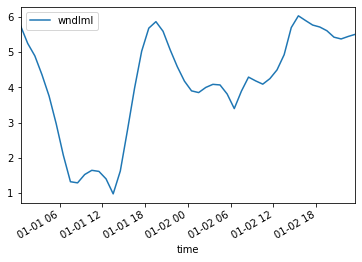

In [12]:
df[(df.lat == 35) & (df.lon == 40)].plot(x='time', y='wndlml')
plt.show()

In [55]:
yds = yd.where((yd.y >= y0) & (yd.y <= yf), drop=True)

In [8]:
yds.dims

NameError: name 'yds' is not defined

In [13]:
merra2_dir = '/Users/michd/Documents/GEODATA/data/merra2'
f = '201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4'
fn = merra2_dir + '/' + f
ds = xr.open_dataset(fn)

In [33]:
ds = xr.open_dataset(xf)

In [34]:
ds.dims

Frozen(SortedKeysDict({'time': 24, 'lat': 361, 'lon': 576}))

In [35]:
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 2011-01-01T00:30:00 ... 2011-01-01T23:30:00
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4

In [36]:
y=list(ds.data_vars)
y

['rhoa',
 'tlml',
 'hlml',
 'pblh',
 'ulml',
 'disph',
 'tstar',
 'vlml',
 'ustar',
 'hflux',
 'z0m']

In [23]:
var_rename = dict((v, v.lower()) for v in list(ds.data_vars))
ds = ds.rename(var_rename)

In [25]:
vars = ['rhoa','ulml']
ds2 = ds[vars]
ds2.data_vars

Data variables:
    rhoa     (time, lat, lon) float32 ...
    ulml     (time, lat, lon) float32 ...

## Misc

In [18]:
from calendar import monthrange

In [33]:
years=slice(2011, 2012)
months=slice(1,2,1)

In [47]:
step = years.step if years.step else 1
yrs = range(years.start, years.stop+step, step)
step = months.step if months.step else 1
mos = range(months.start, months.stop+step, step)

In [49]:
tu = [(yr,mo,monthrange(yr,mo)[1]) for yr in yrs for mo in mos]

In [30]:
import glob, os

In [53]:
if not glob.glob('*.p'):
    print('no matching files')

no matching files


In [61]:
import os, six
weather_data_config = {
#	Single file contains all wind variables (≠ ncep)
# 	https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXFLX.5.12.4/2015/01/MERRA2_400.tavg1_2d_flx_Nx.20150101.nc4
	'surface_flux': dict(tasks_func='tasks_monthly_merra2',
						  prepare_func='prepare_month_surface_flux',
						  template=os.path.join('merra2_dir', '{year}{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.*.nc4'),
						url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2/M2T1NXFLX.5.12.4/{year}/{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.{year}{month:0>2}{day:0>2}.nc4',
						fn = '{year}{month:0>2}/MERRA2_400.tavg1_2d_flx_Nx.{year}{month:0>2}{day:0>2}.nc4')
#	TODO: solar radiation data
}

In [63]:
for k, v in six.iteritems(weather_data_config):
    print(k)
    [print(v2) for v2 in v]

surface_flux
tasks_func
prepare_func
template
url
fn


In [26]:
savedFiles = [('surface_flux', '/Users/michd/Documents/GEODATA/data/merra2/201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4')]

In [28]:
for d, f in savedFiles:
    print(d)
    print(f)

surface_flux
/Users/michd/Documents/GEODATA/data/merra2/201101/MERRA2_400.tavg1_2d_flx_Nx.20110101.nc4


In [32]:
xf = os.path.join(os.path.dirname(f),'trim/',os.path.split(f)[1])